In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017= pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


In [2]:
tabela = pandas.DataFrame(enade2017, columns=['NT_GER','CO_GRUPO', 'CO_MUNIC_CURSO', 'QE_I22', 'QE_I23'])
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
tabela = tabela.loc[(tabela['NT_GER'].notnull())]
tabela = tabela.loc[(tabela['QE_I22'].notnull())]
tabela = tabela.loc[(tabela['QE_I23'].notnull())]
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])

In [4]:
moctabela = tabela[tabela['CO_MUNIC_CURSO'] == 3143302]
moctabela['NT_GER'].describe()

count    1881.000000
mean       41.023977
std        12.385663
min         7.400000
25%        32.100000
50%        40.500000
75%        49.400000
max        75.300000
Name: NT_GER, dtype: float64

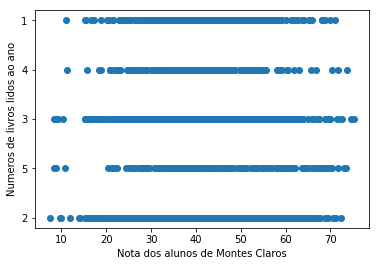

In [5]:
import matplotlib.pyplot as plt

# Excetuando-se os livros indicados na bibliografia do seu curso, quantos livros você leu neste ano?

# A = Nenhum.
# B = Um ou dois.
# C = De três a cinco.
# D = De seis a oito.
# E = Mais de oito.

plt.scatter(moctabela.NT_GER, moctabela.QE_I22)
plt.yticks(['A', 'B', 'C', 'D', 'E'], (1 , 2, 3, 4, 5))
plt.ylabel('Numeros de livros lidos ao ano')
plt.xlabel('Nota dos alunos de Montes Claros')
plt.show()

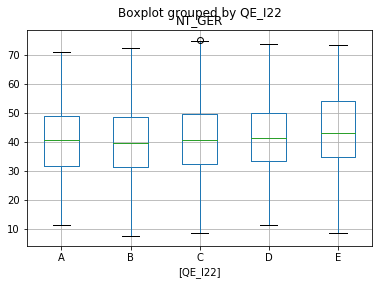

In [11]:
qe22 = pandas.DataFrame(moctabela, columns=['NT_GER', 'QE_I22'])
qe22.boxplot(by='QE_I22')

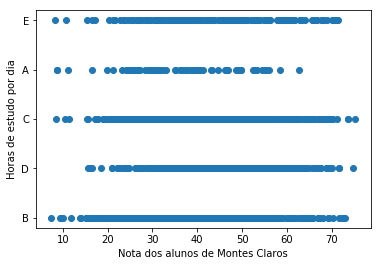

In [12]:
import matplotlib.pyplot as plt

# Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?

# A = Nenhuma, apenas assisto às aulas.
# B = De uma a três.
# C = De quatro a sete.
# D = De oito a doze.
# E = Mais de doze.


plt.scatter(moctabela.NT_GER, moctabela.QE_I23)
plt.ylabel('Horas de estudo por dia')
plt.xlabel('Nota dos alunos de Montes Claros')
plt.show()

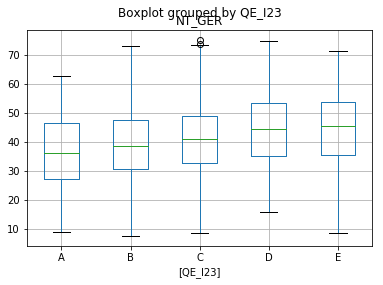

In [13]:
qe23 = pandas.DataFrame(moctabela, columns=['NT_GER', 'QE_I23'])
qe23.boxplot(by='QE_I23')

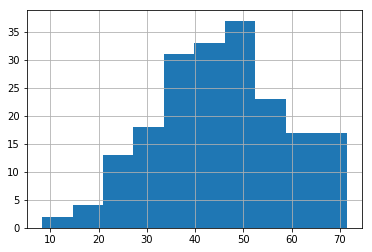

In [31]:
moctabela.NT_GER.loc[tabela.QE_I23 == 'E'].hist()

In [32]:
stat, p = stats.mannwhitneyu(moctabela.NT_GER.loc[moctabela.QE_I23 =='A'], moctabela.NT_GER.loc[moctabela.QE_I23 =='E'])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(moctabela.NT_GER.loc[moctabela.QE_I23 =='A'], moctabela.NT_GER.loc[moctabela.QE_I23 =='E'])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(moctabela.NT_GER.loc[moctabela.QE_I23 =='A'], moctabela.NT_GER.loc[moctabela.QE_I23 =='E'])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=4025.500, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=19.390, p=0.000
Distribução diferente
Anova: Estatisticas=21.516, p=0.000
Distribução diferente
